In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import datetime
import pandas_datareader.data as web

In [2]:
start = datetime.datetime(2019, 9, 27)
end = datetime.datetime(2020, 10, 4)
btc = web.DataReader('BTC-USD','yahoo', start, end)

In [3]:
btc = btc[~btc.index.duplicated(keep='first')]

In [4]:
btc = btc.drop(columns=['High','Low','Open','Close','Volume'])

In [5]:
btc.columns = ['Price']

In [6]:
btc = btc.reset_index()

In [7]:
r = pd.date_range(start=btc.Date.min(), end=btc.Date.max())
btc = btc.set_index('Date').reindex(r).rename_axis('Date').reset_index()

In [8]:
btc['Date'] = pd.to_datetime(btc['Date'])
btc.set_index('Date',inplace=True)

In [9]:
btc = btc.fillna(method='ffill')
btc = btc.fillna(method='bfill')

In [10]:
btc = btc.loc['2019-09-27':'2020-10-04']

In [11]:
start = datetime.datetime(2019, 9, 27)
end = datetime.datetime(2020, 10, 4)
gold = web.DataReader('GC=F','yahoo', start, end)

In [12]:
gold = gold.loc['2019-09-27':'2020-10-04']

In [13]:
gold = gold.drop(columns=['High','Low','Open','Close','Volume'])

In [14]:
gold.columns = ['Price']

In [15]:
gold = gold.reset_index()

In [16]:
r = pd.date_range(start=gold.Date.min(), end=gold.Date.max())
gold = gold.set_index('Date').reindex(r).rename_axis('Date').reset_index()

In [17]:
gold['Date'] = pd.to_datetime(gold['Date'])
gold.set_index('Date',inplace=True)

In [18]:
gold = gold.fillna(method='ffill')
gold = gold.fillna(method='bfill')

In [19]:
frames = [btc,gold]

In [20]:
btc_gold = pd.concat(frames,sort=False,axis=1)

In [21]:
btc_gold.columns = ['BTC','GOLD']

In [34]:
btc_gold = btc_gold.reindex(columns = ['GOLD', 'BTC'])

In [35]:
btc_gold = btc_gold.fillna(method='ffill')
btc_gold = btc_gold.fillna(method='bfill')

In [36]:
x = btc_gold.iloc[:,:-1].values
y = btc_gold.iloc[:,-1].values

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

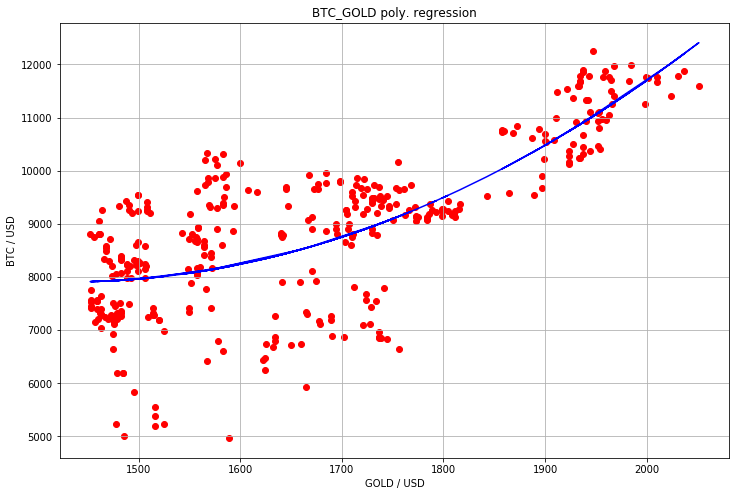

In [40]:
plt.figure(figsize=(12,8))
plt.grid()
plt.scatter(x, y, color='red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)),color='blue')
plt.title('BTC_GOLD poly. regression')
plt.xlabel('GOLD / USD')
plt.ylabel('BTC / USD')
plt.show()

In [46]:
lin_reg_2.predict(poly_reg.fit_transform([[1922]]))

array([10724.44692048])